In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt

#Optional, but suppresses the copy warnings...
pd.options.mode.chained_assignment = None

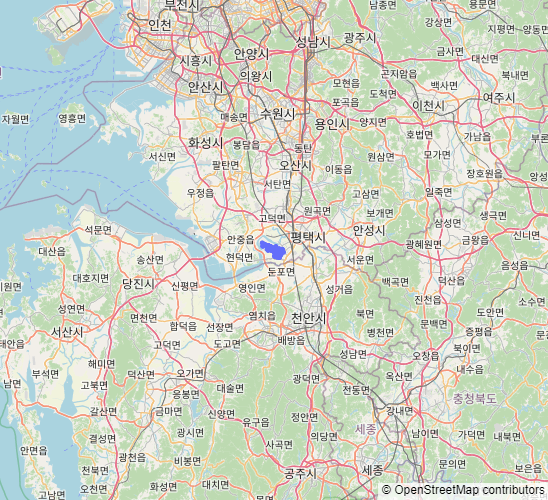

In [2]:
path = "locationSheet.csv"
df=pd.read_csv(path)
fig = px.scatter_mapbox(df, lat="lat", lon="long", 
                        hover_name="notes",
                        center=dict(lat=36.96348,lon=127.0171))
fig.update_layout(mapbox_style="open-street-map") #loads background map
fig.update_layout(height=500,margin={"r":0,"t":0,"l":0,"b":0}) #makes map bigger and fills space
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

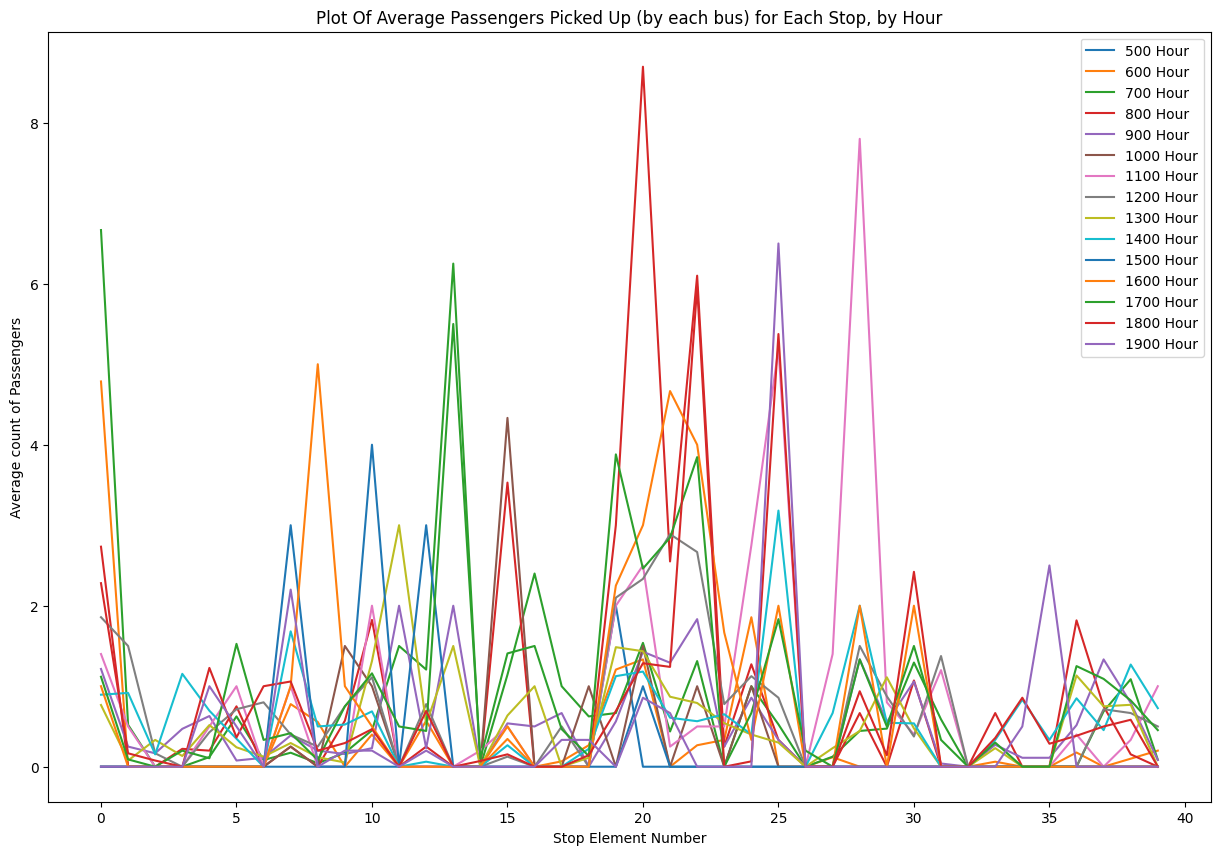

In [3]:
path = "busData.csv"
countDF = pd.read_csv(path).fillna(0)
stopList = np.sort(countDF.Stop.unique())
countDF['dtg'] = pd.to_datetime(countDF.Date + " " + countDF.Time)
hourList = np.sort([int(x) for x in countDF.dtg.dt.hour.unique()])
stopCountDict = dict()
# this builds a dictionary to store the average number of passengers, by hour, for each of the stops
for tempStop in stopList:
    stopCount = countDF[countDF.Stop==tempStop]
    hourCount = [0]*len(hourList)
    for i in range(len(hourList)):
        hourDF = stopCount[stopCount.dtg.dt.hour==hourList[i]]
        hourCount[i] = np.mean(hourDF.Pickup)
    stopCountDict[tempStop]=np.nan_to_num(hourCount)   

#now to  plot each element in the dictionary
f = plt.figure()
f.set_figwidth(15) #manually setting image size to ensure placement is correct
f.set_figheight(10)
plt.plot([stopCountDict[i] for i in stopList])
plt.title("Plot Of Average Passengers Picked Up (by each bus) for Each Stop, by Hour")
plt.ylabel("Average count of Passengers")
plt.xlabel("Stop Element Number")
plt.legend(["%s00 Hour"%i for i in hourList])
plt.show

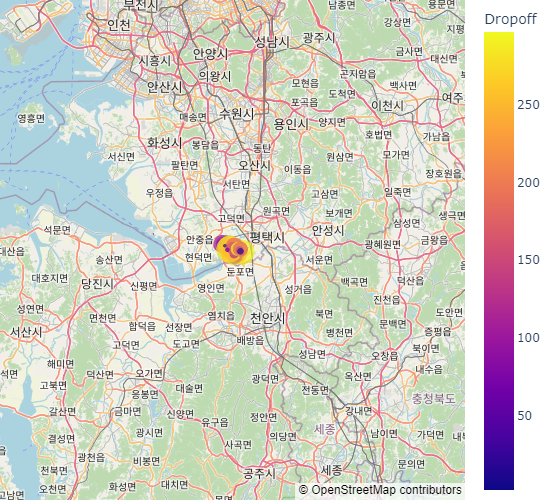

In [4]:
# This updates the "stop" column so that it's only numbers... and yes, it's terrible. But it works!
def trim(row):
    temp = row['Stop']
    return temp[0:2]
def trim2(row):
    thisOne = row['Stop2']
    if thisOne[-1]=='A':
        return int(thisOne[0])
    else: return int(thisOne)
countDF['Stop2'] = countDF.apply(lambda row:trim(row),axis=1)
countDF['Stop'] = countDF.apply(lambda row:trim2(row),axis=1)
# Now counting how frequently (in the dataset) we used stops for pickup/dropoff
puDict = dict()
doDict = dict()
stopList = np.sort(countDF.Stop.unique())
for stopNo in stopList:
    tempDF = countDF[countDF.Stop==stopNo]
    puDict[stopNo] = sum(tempDF.Pickup)
    doDict[stopNo] = sum(tempDF.Dropoff)
    
# Now plotting them
path = "locationBusOnly.csv"
df=pd.read_csv(path)
df['Pickup']=df.Stop.map(puDict)
df['Dropoff']=df.Stop.map(doDict)
fig = px.scatter_mapbox(df, lat="lat", lon="long", size="Pickup", color="Dropoff",
                        hover_name="notes", 
                        center=dict(lat=36.96348,lon=127.0171))
fig.update_layout(mapbox_style="open-street-map") #loads background map
fig.update_layout(height=500,margin={"r":0,"t":0,"l":0,"b":0}) #makes map bigger and fills space
fig.show()

We note that, for this picture, the size of the dot indicates how frequently it was used for pickup, and the colour how frequently it was used for dropoff.

# Bus Analysis by Weekday/Weekend

In [5]:
path = "busData.csv"
countDF = pd.read_csv(path).fillna(0)
countDF['Stop2'] = countDF.apply(lambda row:trim(row),axis=1)
countDF['Stop'] = countDF.apply(lambda row:trim2(row),axis=1)
countDF['Date'] = pd.to_datetime(countDF.Date).dt.dayofweek

In [6]:
countDF[countDF.Date>4]

Empty DataFrame
Columns: [Stop, Date, Time, Pickup, Dropoff, Route, ID, Stop2]
Index: []

All data are only weekday. Nevermind

## Easier Stop Readability

In [7]:
countDF = pd.read_csv(path).fillna(0)
countDF['Stop2'] = countDF.apply(lambda row:trim(row),axis=1)
countDF['Stop'] = countDF.apply(lambda row:trim2(row),axis=1)
stopList = np.sort(countDF.Stop.unique())
countDF['dtg'] = pd.to_datetime(countDF.Date + " " + countDF.Time)
hourList = np.sort([int(x) for x in countDF.dtg.dt.hour.unique()])

puCountDict = dict()
doCountDict = dict()
for tempStop in stopList:
    stopCount = countDF[countDF.Stop==tempStop]
    hourCount = [0]*len(hourList)
    for i in range(len(hourList)):
        hourDF = stopCount[countDF.dtg.dt.hour==hourList[i]]
        hourCount[i] = np.mean(hourDF.Pickup)
    puCountDict[tempStop]=np.nan_to_num(hourCount) 
    for j in range(len(hourList)):
        hourDF = stopCount[countDF.dtg.dt.hour==hourList[i]]
        hourCount[i] = np.mean(hourDF.Dropoff)
    doCountDict[tempStop]=np.nan_to_num(hourCount) 

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_16084/2284278331.py:14: UserWarning:

Boolean Ser

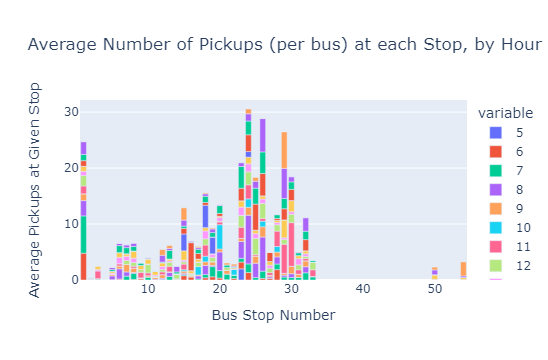

In [8]:
df3 = pd.DataFrame([puCountDict[x] for x in stopList],index=stopList,columns=hourList)
fig=px.bar(df3,x=stopList,y=df3.columns,
            labels={"x":"Bus Stop Number","value":"Average Pickups at Given Stop"},
            title="Average Number of Pickups (per bus) at each Stop, by Hour")
fig.show()

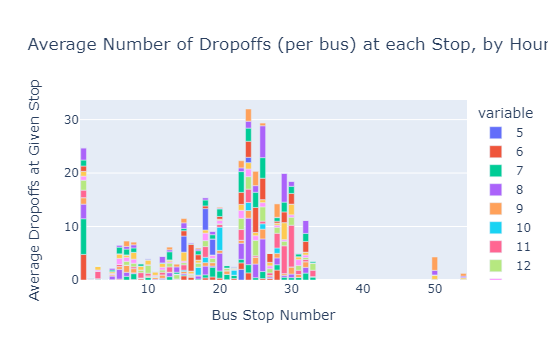

In [9]:
df3 = pd.DataFrame([doCountDict[x] for x in stopList],index=stopList,columns=hourList)
fig=px.bar(df3,x=stopList,y=df3.columns,
            labels={"x":"Bus Stop Number","value":"Average Dropoffs at Given Stop"},
            title="Average Number of Dropoffs (per bus) at each Stop, by Hour")
fig.show()

## Consideration of a Particular Route's Stops

In [10]:
# This cell is for exploring the observed routes taken (i.e., the ordering of the green route)
df2=countDF
df2=df2[(df2.Route=="Blue")]
for rider in df2.ID.unique():
    tempDF = df2[df2.ID==rider]
    stop1 = tempDF.Stop.iloc[1]
    #print("Rider ",rider,": ",stop1)

In [11]:
#This builds me a picture of how many people were on the Green route bus at each stop
df2=countDF[countDF.Route=="Green"]
df2["Count"]=-1
record = []
for rider in df2.ID.unique():
    tempDF = df2[df2.ID==rider]
    #print("Rider ",rider,': ',len(tempDF)," rows")    
    tempDF.Count = tempDF.Pickup-tempDF.Dropoff
    for i in range(len(tempDF)-1):
        tempDF.iloc[i+1,9]=tempDF.iloc[i,9]+[tempDF.iloc[i+1,9]]
    least = min(tempDF.Count)
    #print(least)
    if least<0: offset=abs(least)
    else: offset=0
    tempDF.Count = tempDF.Count+offset
    record.append(list(tempDF.Count[0:31]))

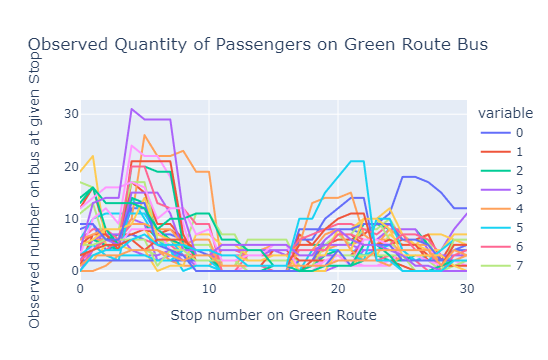

In [12]:
gStops = [23,24,25,27,26,13,12,8,11,6,2,1,33,32,33,1,2,6,11,8,12,13,26,27,25,24,23,17,50,15,54]
riders=df2.ID.unique()
df3 = pd.DataFrame(record)
df3 = df3.transpose()
fig=px.line(df3,
           labels={"index":"Stop number on Green Route","value":"Observed number on bus at given Stop"},
            title="Observed Quantity of Passengers on Green Route Bus")
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

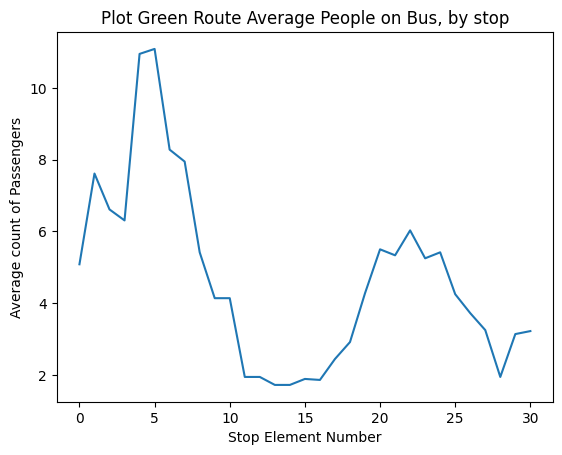

In [13]:
avgGreenBus=df3.mean(axis=1)

#f = plt.figure()
#f.set_figwidth(15) #manually setting image size to ensure placement is correct
#f.set_figheight(10)
plt.plot(avgGreenBus)
plt.title("Plot Green Route Average People on Bus, by stop")
plt.ylabel("Average count of Passengers")
plt.xlabel("Stop Element Number")
plt.show